# Explore here

# BLOQUE 1: Carga de librerías, logging y credenciales

In [104]:
import os
import logging
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.exceptions import SpotifyException
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# 01. Configurar logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(message)s"
)

In [ ]:
# 03. Cargar variables de entorno desde
load_dotenv()
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

if not client_id or not client_secret:
    raise ValueError("CLIENT_ID o CLIENT_SECRET no definidos en .env")

logging.info("Credenciales cargadas correctamente.")

2025-07-19 14:42:14,966 | INFO | Credenciales cargadas correctamente.


# BLOQUE 2: Instanciación segura del cliente de Spotify

In [115]:
# 04. Crear el gestor de credenciales y el cliente Spotipy
auth = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth)
logging.info("Cliente Spotipy listo.")

2025-07-19 14:46:56,726 | INFO | Cliente Spotipy listo.


# BLOQUE 3: Obtener Top 10 canciones de un artista

In [116]:
# 05. URI o ID del artista
ARTIST_URI = "spotify:artist:36QJpDe2go2KgaRleHCDTp"

In [117]:
# 06. Solicitud a la API (name, popularity, duration)
tracks_json = spotify.artist_top_tracks(ARTIST_URI, country="US")["tracks"][:10]
track_data = [
    {
        "name":         t["name"],
        "popularity":   t["popularity"],
        "duration_min": t["duration_ms"] / 60000
    }
    for t in tracks_json
]
logging.info(f"Se descargaron {len(track_data)} tracks.")

2025-07-19 14:47:35,103 | INFO | Se descargaron 10 tracks.


# BLOQUE 4: DataFrame y Top 5 más populares

In [118]:
# 07. Convertir a DataFrame
df_tracks = pd.DataFrame(track_data)

In [121]:
# 08. Ordenar por popularidad descendente
df_sorted = df_tracks.sort_values("popularity", ascending=False)
top5_most_popular = df_sorted.head(5)

print("Top 5 canciones más populares")
display(top5_most_popular)

Top 5 canciones más populares


,name,popularity,duration_min
0,Stairway to Heaven - Remaster,83,8.047167
1,Immigrant Song - Remaster,81,2.437500
2,Whole Lotta Love - 1990 Remaster,79,5.564883
3,Black Dog - Remaster,76,4.923100
4,Ramble On - 1990 Remaster,75,4.388883


# BLOQUE 5: Relación duración vs popularidad

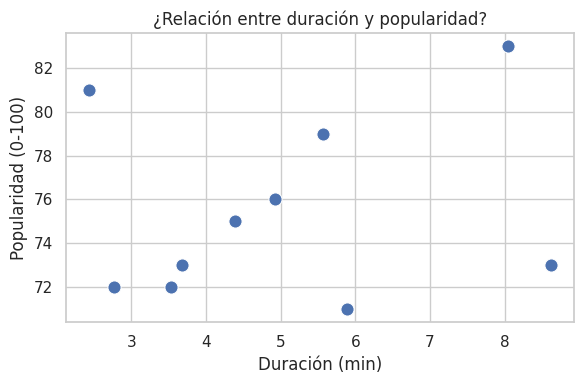

In [123]:
# 09. Scatter plot duración vs popularidad
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_tracks, x="duration_min", y="popularity", s=90)
plt.xlabel("Duración (min)")
plt.ylabel("Popularidad (0‑100)")
plt.title("¿Relación entre duración y popularidad?")
plt.tight_layout()
plt.show()